# Genetic Algorithm for Himmelblau Function Optimization

This notebook demonstrates how a **Genetic Algorithm (GA)** can be used to minimize  
the **Himmelblau function**, a famous nonlinear optimization problem.

We'll go through each step of the algorithm, including:
- Random population initialization  
- Fitness evaluation  
- Elitism (preserving the best individuals)  
- Tournament selection  
- Crossover (mixing parent genes)  
- Mutation (random changes to increase diversity)

At the end, we'll visualize:
- The convergence of the algorithm over generations  
- The final population on the function's contour plot

## 1. Import Required Libraries
We'll start by importing the necessary Python libraries.

In [46]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

## 2. Define Algorithm Parameters
Here we define the key parameters that control the behavior of the genetic algorithm.

In [47]:
POP_SIZE = 100          # Number of individuals in each generation
GENERATIONS = 150       # Total number of generations
MUTATION_RATE = 0.1     # Probability of mutation
ELITE_PERCENT = 0.05    # Percentage of elite individuals to carry over
BOUND_LOW, BOUND_HIGH = -6, 6  # Search space limits for x1 and x2

## 3. Define Objective and Fitness Functions

We are using the **Himmelblau function** as our objective:
\[
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
\]

Our goal is to **minimize** this function.

The fitness function is defined as:
\[
fitness = \frac{1}{1 + f(x, y)}
\]
This ensures that smaller function values result in higher fitness scores.

In [48]:
def f(x1, x2):
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

def fitness(x):
    x1, x2 = x
    return 1 / (1 + f(x1, x2))

## 4. Initialize the Population
We randomly initialize individuals within the defined bounds.

In [49]:
def initialize_population():
    return np.random.uniform(BOUND_LOW, BOUND_HIGH, (POP_SIZE, 2))

## 5. Elitism
Elitism ensures that the top-performing individuals (with the highest fitness)  
are carried over directly to the next generation.

In [50]:
def elitism(pop, fits):
    elite_count = int(ELITE_PERCENT * POP_SIZE)
    elite_idx = np.argsort(fits)[-elite_count:]
    return pop[elite_idx]

## 6. Tournament Selection
We randomly pick two individuals and choose the one with the higher fitness as the winner.  
This helps maintain diversity while favoring better individuals.

In [51]:
def tournament_selection(pop, fits):
    selected = []
    for _ in range(len(pop)):
        i, j = rd.randint(0, POP_SIZE - 1), rd.randint(0, POP_SIZE - 1)
        winner = pop[i] if fits[i] > fits[j] else pop[j]
        selected.append(winner)
    return np.array(selected)

## 7. Crossover
We perform a **blend crossover** between two parents using a random coefficient `alpha`.

In [52]:
def crossover(p1, p2):
    alpha = np.random.rand()
    c1 = alpha * p1 + (1 - alpha) * p2
    c2 = (1 - alpha) * p1 + alpha * p2
    return c1, c2

## 8. Mutation
We introduce small random changes to individuals to keep genetic diversity in the population.

In [53]:
def mutation(pop):
    for i in range(len(pop)):
        if np.random.rand() < MUTATION_RATE:
            pop[i] += np.random.uniform(-0.5, 0.5, 2)
            pop[i] = np.clip(pop[i], BOUND_LOW, BOUND_HIGH)
    return pop

## 9. Main Genetic Algorithm Loop

This is where everything comes together:
- Evaluate fitness  
- Apply elitism, selection, crossover, and mutation  
- Track the best solution per generation  
- Print progress and store all populations for visualization

In [54]:
def genetic_algorithm():
    population = initialize_population()
    best_history = []
    populations = []  # برای نگهداری جمعیت در هر نسل

    for g in range(GENERATIONS):
        fits = np.array([fitness(ind) for ind in population])
        elites = elitism(population, fits)
        selected = tournament_selection(population, fits)
        new_pop = []

        for i in range(0, POP_SIZE, 2):
            p1, p2 = selected[i], selected[(i + 1) % POP_SIZE]
            c1, c2 = crossover(p1, p2)
            new_pop.extend([c1, c2])

        new_pop = np.array(new_pop)
        new_pop = mutation(new_pop)
        new_pop[:len(elites)] = elites
        population = new_pop

        fits = np.array([fitness(ind) for ind in population])
        best_idx = np.argmax(fits)
        best = population[best_idx]
        best_history.append(f(best[0], best[1]))
        populations.append(population.copy())

        print(f"Generation {g+1:03d}: X=({best[0]:.4f}, {best[1]:.4f}), f(X)={f(best[0], best[1]):.6f}")

    best_idx = np.argmax([fitness(ind) for ind in population])
    best_sol = population[best_idx]
    best_val = f(best_sol[0], best_sol[1])

    print("\nFinal Best Answer:")
    print(f"X = ({best_sol[0]:.4f}, {best_sol[1]:.4f})")
    print(f"f(X) = {best_val:.6f}")

    return population, best_history, populations

## 10. Convergence Plot

This graph shows how the best value of `f(X)` changes  
over generations — ideally decreasing toward the global minimum.

Generation 001: X=(3.2079, 1.5827), f(X)=2.419531
Generation 002: X=(3.2079, 1.5827), f(X)=2.419531
Generation 003: X=(-3.6419, -3.4092), f(X)=2.274144
Generation 004: X=(-3.6419, -3.4092), f(X)=2.274144
Generation 005: X=(2.8647, 2.2019), f(X)=0.858061
Generation 006: X=(2.9023, 1.9095), f(X)=0.648747
Generation 007: X=(3.0015, 2.0099), f(X)=0.002074
Generation 008: X=(3.0015, 2.0099), f(X)=0.002074
Generation 009: X=(3.0015, 2.0099), f(X)=0.002074
Generation 010: X=(3.0015, 2.0099), f(X)=0.002074
Generation 011: X=(3.0015, 2.0099), f(X)=0.002074
Generation 012: X=(3.0015, 2.0099), f(X)=0.002074
Generation 013: X=(3.0015, 2.0099), f(X)=0.002074
Generation 014: X=(2.9936, 2.0008), f(X)=0.001400
Generation 015: X=(2.9950, 2.0089), f(X)=0.001389
Generation 016: X=(2.9957, 2.0033), f(X)=0.000587
Generation 017: X=(2.9989, 2.0014), f(X)=0.000047
Generation 018: X=(2.9989, 2.0014), f(X)=0.000047
Generation 019: X=(2.9989, 2.0014), f(X)=0.000047
Generation 020: X=(2.9989, 2.0014), f(X)=0.000

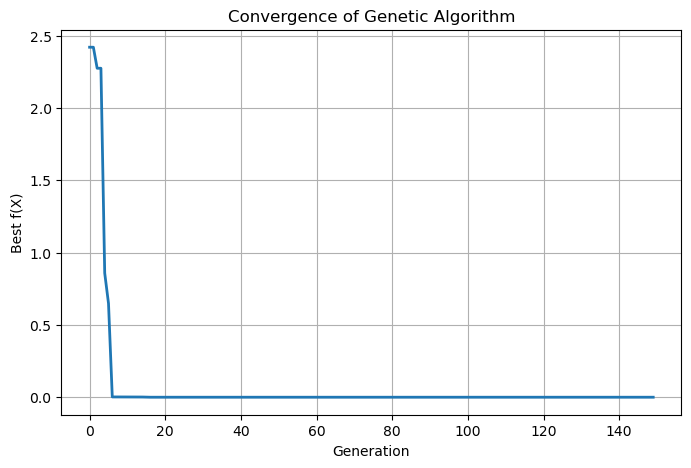

In [55]:
population, best_history, populations = genetic_algorithm()

plt.figure(figsize=(8,5))
plt.plot(best_history, linewidth=2)
plt.title("Convergence of Genetic Algorithm")
plt.xlabel("Generation")
plt.ylabel("Best f(X)")
plt.grid(True)
plt.show()

## 11. Contour Plot of the Final Population

Here we visualize the final population on the **Himmelblau function** contour map.  
The red dots represent the final individuals after all generations.

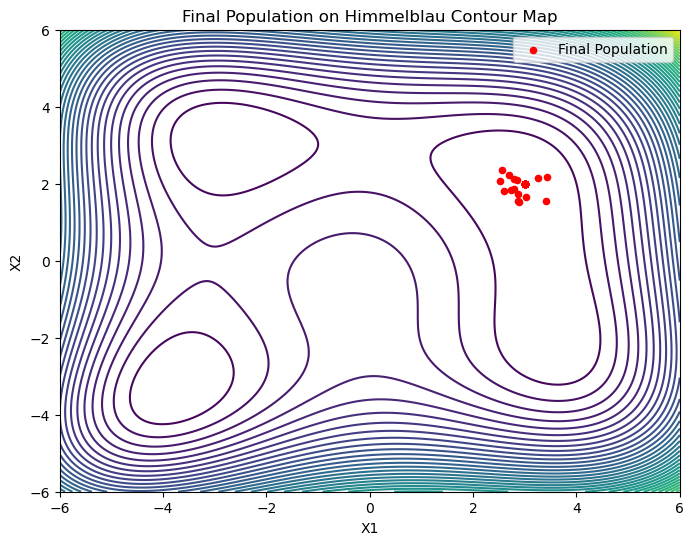

In [56]:
x = np.linspace(BOUND_LOW, BOUND_HIGH, 400)
y = np.linspace(BOUND_LOW, BOUND_HIGH, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.scatter(population[:,0], population[:,1], c='red', s=20, label='Final Population')
plt.title("Final Population on Himmelblau Contour Map")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

## 12. Optional: Population Movement Animation

If you’d like to **see how the population evolves over time**,  
this section animates every 10 generations on the contour map.

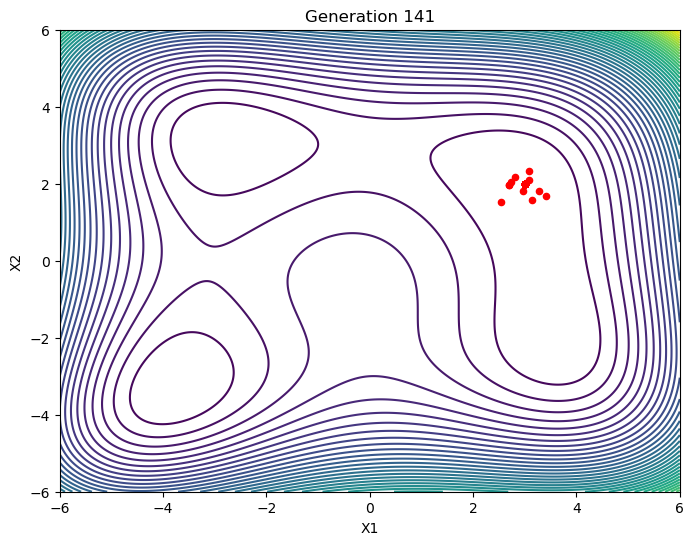

In [57]:
from IPython.display import clear_output
import time

x = np.linspace(BOUND_LOW, BOUND_HIGH, 400)
y = np.linspace(BOUND_LOW, BOUND_HIGH, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

for gen, pop in enumerate(populations[::10]):  # هر 10 نسل یه فریم
    clear_output(wait=True)
    plt.figure(figsize=(8,6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.scatter(pop[:,0], pop[:,1], c='red', s=20)
    plt.title(f"Generation {gen*10+1}")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    time.sleep(0.5)